In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.tree import *
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Plots

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

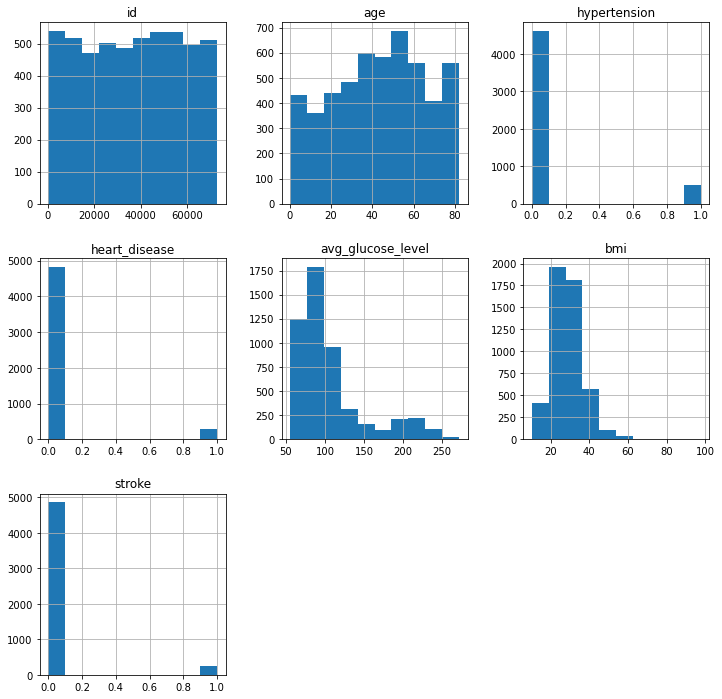

In [4]:
df.hist(figsize=(12,12))

In [5]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## One Hot Encoding

In [10]:
category = ['gender','ever_married','Residence_type','smoking_status','work_type']

In [11]:
for i in category:
    dummy = pd.get_dummies(df[i],drop_first=True,prefix=f"{i}_")
    df = pd.concat([df,dummy],axis=1)
                           

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,1,1,0,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,1,0,0,1,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0


In [13]:
df = df.drop([*category,'id'],axis=1)

In [14]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender__Male,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,67.0,0,1,228.69,36.6,1,1,0,1,1,1,0,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,1,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [15]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender__Male,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,-0.027623,-0.010659,0.679125,0.014180,0.236897,0.119307,0.073133,-0.078653,0.116534,0.327989,-0.634215
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,0.021275,-0.004597,0.164243,-0.007913,0.058853,0.065063,0.031240,-0.021608,-0.005413,0.115442,-0.129506
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,0.085717,-0.003343,0.114644,0.003092,0.066804,-0.021856,0.044049,-0.015712,0.000027,0.086760,-0.091634
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,0.054580,0.011489,0.155068,-0.004946,0.068111,0.023885,0.017646,-0.014675,0.016588,0.062694,-0.102250
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,-0.026020,-0.011802,0.341695,-0.000122,0.107031,0.107964,0.088324,-0.028602,0.208029,0.072701,-0.448674
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000,0.009117,-0.003166,0.108340,0.015458,0.064556,-0.004129,0.008939,-0.014882,0.011888,0.062168,-0.083869
gender__Male,-0.027623,0.021275,0.085717,0.054580,-0.026020,0.009117,1.000000,-0.011757,-0.029936,-0.005937,0.042738,-0.098813,0.011477,0.011496,-0.032639,-0.025971,0.089283
gender__Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.014217,0.030568,-0.010728,-0.005978,-0.000920,0.012092,-0.006112,-0.005514
ever_married__Yes,0.679125,0.164243,0.114644,0.155068,0.341695,0.108340,-0.029936,-0.019327,1.000000,0.006261,0.171256,0.102845,0.105226,-0.090838,0.153830,0.192716,-0.544441
Residence_type__Urban,0.014180,-0.007913,0.003092,-0.004946,-0.000122,0.015458,-0.005937,-0.014217,0.006261,1.000000,0.007654,-0.024466,0.027266,0.022859,-0.018173,0.010594,-0.002309


In [16]:
df.corrwith(df["stroke"])

age                                0.245257
hypertension                       0.127904
heart_disease                      0.134914
avg_glucose_level                  0.131945
bmi                                0.042374
stroke                             1.000000
gender__Male                       0.009117
gender__Other                     -0.003166
ever_married__Yes                  0.108340
Residence_type__Urban              0.015458
smoking_status__formerly smoked    0.064556
smoking_status__never smoked      -0.004129
smoking_status__smokes             0.008939
work_type__Never_worked           -0.014882
work_type__Private                 0.011888
work_type__Self-employed           0.062168
work_type__children               -0.083869
dtype: float64

## Train - Test

In [17]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values

In [18]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    imputer = KNNImputer(n_neighbors=2)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
    
    print(f)

0.9103862915029026
0.9161979874046177
0.9161979874046177
0.9146088446076077
0.9185878572636564


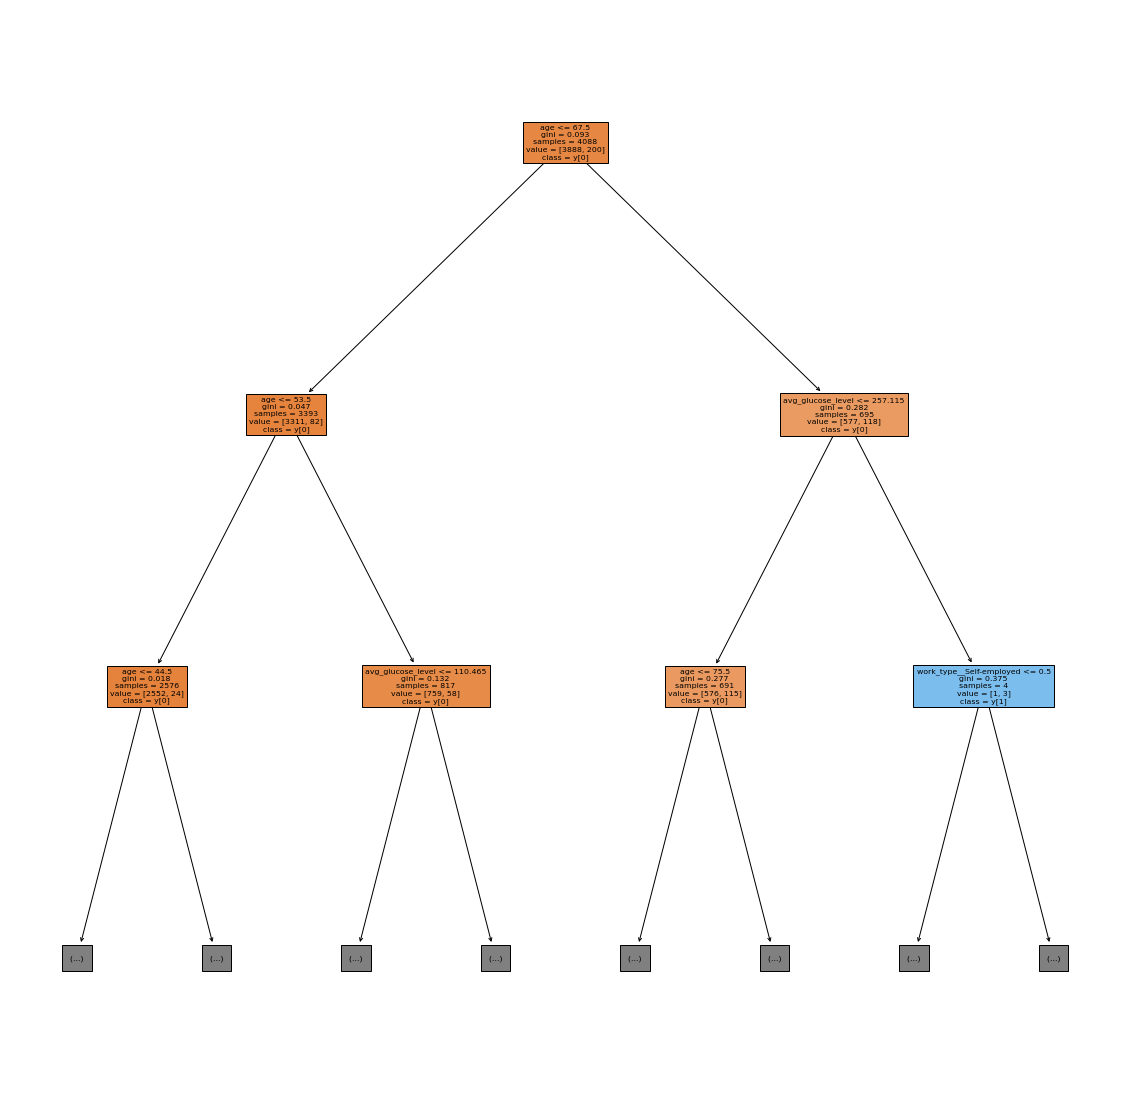

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=df.drop(['stroke'],axis=1).columns,max_depth=2,filled=True,class_names= True)
plt.show()